In [2]:
import numpy as np
from scipy.io import loadmat 

In [3]:
data = loadmat('ex3data1.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

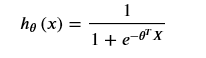

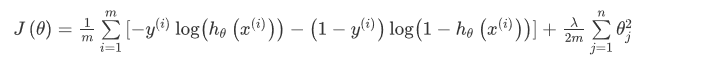

In [10]:
def cost(theta, X, y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply(1-y, np.log(1 - sigmoid(X * theta.T)))
    reg = (lr / (2 * len(X))) * np.sum(np.power(theta[:, 1:theta.shape[1]], 2))
    return np.sum(first -second) / (len(X)) + reg

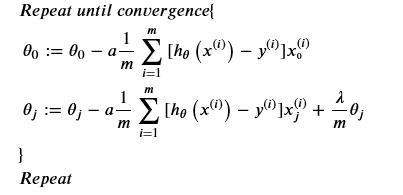

In [6]:
def gradient(theta, X, y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    error = sigmoid(X * theta.T) - y
    grad = (X.T * error / len(X)).T + lr / len(X) * theta
    grad[0, 0] = np.sum(np.multiply(error, X[:, 0])) / len(X)
    return np.array(grad).ravel()

In [7]:
from scipy.optimize import minimize
def one_vs_all(X, y, num_labels, lr):
    rows = X.shape[0]
    params = X.shape[1]
    all_theta = np.zeros((num_labels, params+1))
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    for i in range(1, num_labels + 1):
        theta = np.zeros(params + 1)
        y_i = [1 if (label == i) else 0 for label in y]
        y_i = np.reshape(y_i, (rows, 1))
        fmin = minimize(fun=cost, x0=theta, args=(X, y_i, lr), method='TNC', jac=gradient)
        all_theta[i-1, :] = fmin.x
    return all_theta
        

In [11]:
all_theta = one_vs_all(data['X'], data['y'], 10, 1)
print(all_theta)

[[-2.38329625e+00  0.00000000e+00  0.00000000e+00 ...  1.30469860e-03
  -8.20996452e-10  0.00000000e+00]
 [-3.18487445e+00  0.00000000e+00  0.00000000e+00 ...  4.46292788e-03
  -5.08767264e-04  0.00000000e+00]
 [-4.79972803e+00  0.00000000e+00  0.00000000e+00 ... -2.86921319e-05
  -2.47368343e-07  0.00000000e+00]
 ...
 [-7.98793179e+00  0.00000000e+00  0.00000000e+00 ... -8.95180785e-05
   7.21851354e-06  0.00000000e+00]
 [-4.57166512e+00  0.00000000e+00  0.00000000e+00 ... -1.33590481e-03
   9.99352426e-05  0.00000000e+00]
 [-5.40436492e+00  0.00000000e+00  0.00000000e+00 ... -1.16595363e-04
   7.88288067e-06  0.00000000e+00]]


In [16]:
def predict_all(X, all_theta):
    rows = X.shape[0]
    params = X.shape[1]
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
    h = sigmoid(X * all_theta.T)
    h_argmax = np.argmax(h, axis=1)
    h_argmax = h_argmax + 1
    return h_argmax

In [19]:
y_pred = predict_all(data['X'], all_theta)
correct = [1 if (a == b) else 0 for (a, b) in zip(y_pred, data['y'])]
acc = (sum(map(int, correct))) / float(len(correct))
print('accuracy = {0}%'.format(acc * 100))

accuracy = 94.46%
